<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
                        feature        VIF
0              Avg. Area Income  29.650899
1           Avg. Area House Age  27.447775
2     Avg. Area Number of Rooms  45.257291
3  Avg. Area Number of Bedrooms  14.537873
4               Area Population  12.825450


-227466.46261776472

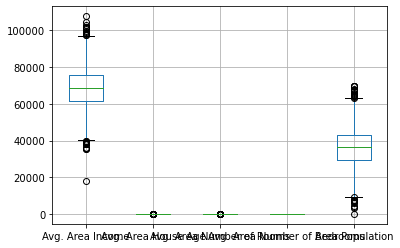

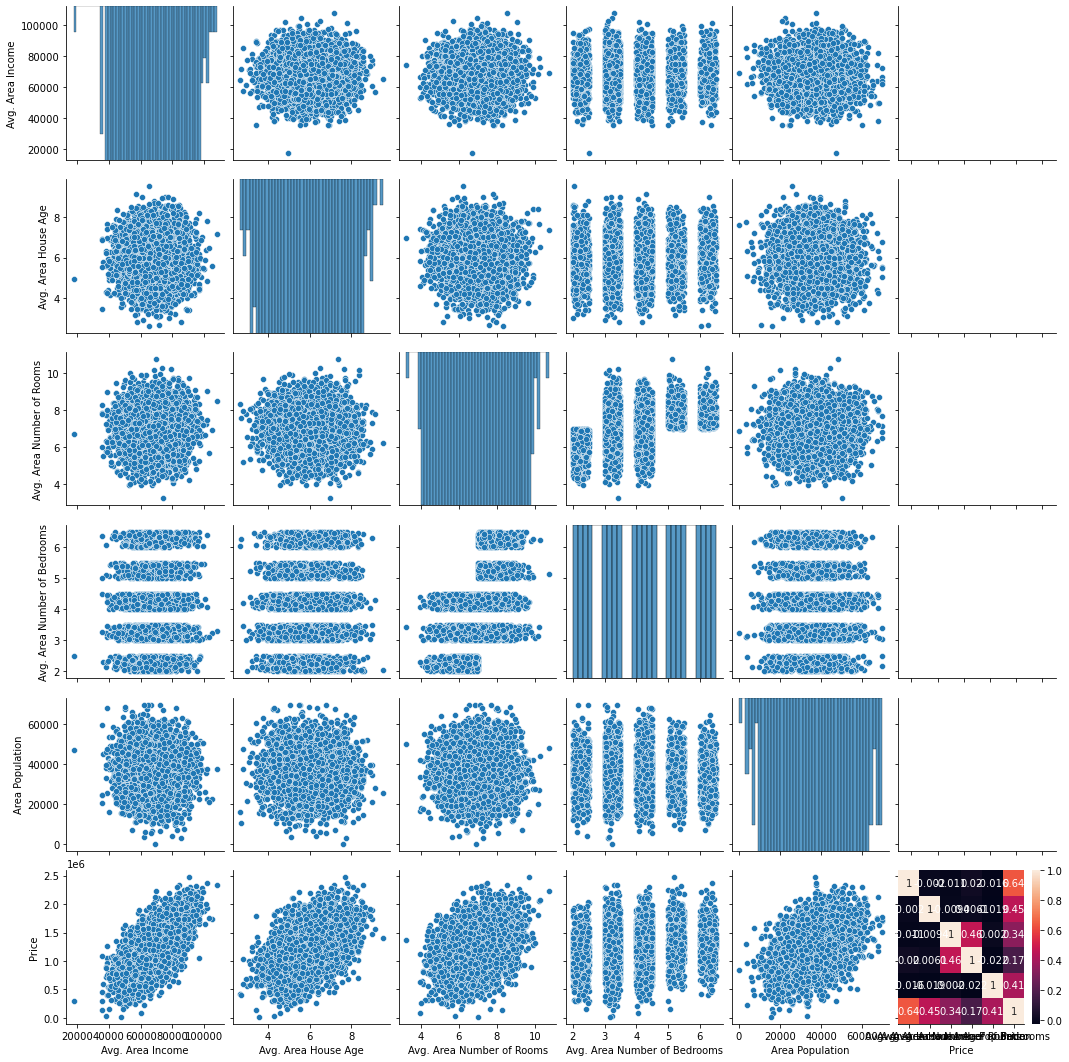

In [2]:
# -*- coding: utf-8 -*-
"""Untitled5.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1Y-C_3irUO4Vauy9vdhJcUnnVk7SFtvK8
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler



data = pd.read_csv("https://raw.githubusercontent.com/nursnaaz/25DaysInMachineLearning/master/18%20-%20Day%20-%2018%20-%20Linear%20Regression%20Practise%20Python/USA_Housing.csv")

data.head()

data.info()

data.describe().T

data.duplicated().sum()

data.isnull().sum()

data.drop(columns="Address", inplace = True)

data.head()

data.drop(columns = "Price").boxplot()

sns.pairplot(data)

data.corr()

sns.heatmap(data.corr(), annot=True)

#variance inflation factor - VIF

X = data.drop(columns = "Price")
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

vif_data[vif_data['VIF']>30]['feature'].values

X = data[['Avg. Area Income']]
y = data['Price']

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.3, random_state=2)

train_X.shape, test_X.shape, train_y.shape, test_y.shape

model = LinearRegression()

model.fit(train_X,train_y)

model.coef_

model.intercept_

#House Price = 21.28 * Income - 227466.46


# Linear Regression Assumptions

In [ ]:
1. There is a linear relationship between X and y (Correlation)
2. There can be little or no Multicollinearity
3. The relatioship between actal and prtedicted should be linear
4. The error should be normally distributed
5. The residual variance should be Homasacadicity(constant)

In [3]:
train_pred = model.predict(train_X)

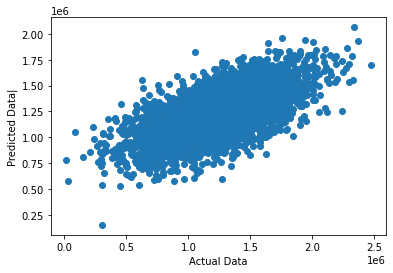

In [5]:
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.scatter(train_y,train_pred)

In [6]:
error = train_y-train_pred

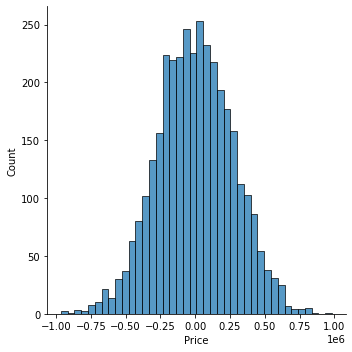

In [9]:
sns.displot(error)

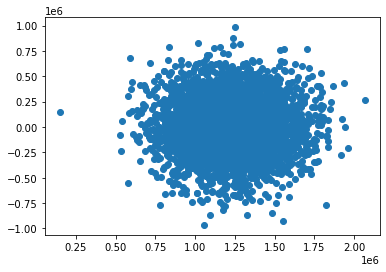

In [10]:
plt.scatter(train_pred, error)